In [1]:
################################################################
# Purpose: Read TIF satellite data 
# Author: Aster Volta
# Date: 08/08/22
################################################################

# Set up the libraries and modules
#
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import rasterio
import seaborn as sns

Dataset https://disc.gsfc.nasa.gov/datasets/FLDAS_NOAH01_C_GL_MA_001/summary

FLDAS project https://ldas.gsfc.nasa.gov/FLDAS/

Famine Early Warning Systems Network https://fews.net/

README https://hydro1.gesdisc.eosdis.nasa.gov/data/FLDAS/FLDAS_NOAH01_C_GL_MA.001/doc/README_FLDAS.pdf

In [2]:
file_in = input('TIF file name: ')

TIF file name: GIOVANNI-g4.timeAvgMap.FLDAS_NOAH01_C_GL_MA_001_Evap_tavg.20200801-20200831.180W_60S_180E_90N.tif


### Input file name and no data value:

In [3]:
with rasterio.open(file_in) as src:
    array = src.read(1)

array[array==-9999] = np.nan

In [4]:
array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

## write file name below:

In [5]:
filename_out = input('CSV file name: ')

CSV file name: GIOVANNI-g4.timeAvgMap.FLDAS_NOAH01_C_GL_MA_001_Evap_tavg.20200801-20200831.180W_60S_180E_90N.csv


In [6]:
np.savetxt(str(filename_out), array, delimiter=",")

### CONT. TO PLOT HEAT MAP OF INITIAL CSV

Confirm it works by plotting heat map:

In [7]:
df_ssma = pd.read_csv(filename_out, header=None)
df_ssma

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
month = input('input month: ')

input month: august


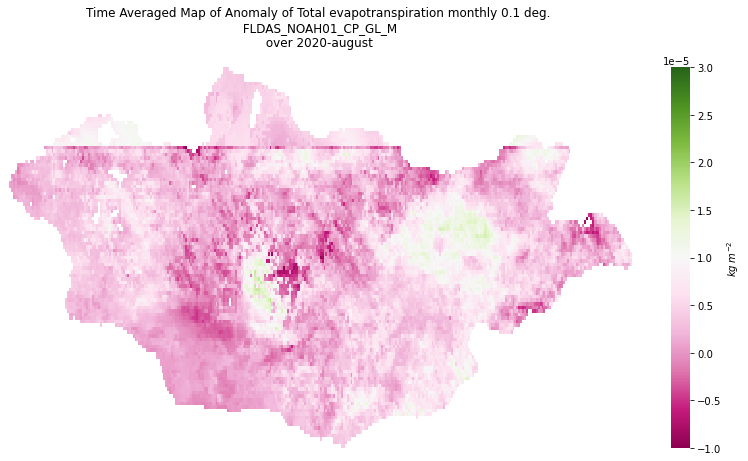

In [9]:
# HeatMap
fig, ax = plt.subplots(figsize=(14,7))         # Sample figsize in inches
heat_map = sns.heatmap(df_ssma, xticklabels=False, yticklabels=False, vmin=-1e-5, vmax=3e-5, cmap="PiYG", 
                             cbar_kws={'label': '$kg\;m^{-2}\;$'})

# Add Title
plt.title( 'Time Averaged Map of Anomaly of Total evapotranspiration monthly 0.1 deg. \n FLDAS_NOAH01_CP_GL_M \n over 2020-'+month+' \n')

# Display
plt.show()

##### THE END ✨